<a href="https://colab.research.google.com/github/Tanu-N-Prabhu/Python/blob/master/Machine%20Learning/05_projects/Sentiment%20Analysis/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Twitter Sentiment Analysis Using NLP

This notebook demonstrates how to perform **sentiment analysis** using Natural Language Processing (NLP). We'll build a model to classify text reviews as **positive** or **negative**. This notebook uses a labeled dataset of tweets to predict whether a tweet has a positive (1) or negative (0) sentiment.




## **Install Dependencies (Optional for Colab)**




In [ ]:
# Uncomment if running in Google Colab
# !pip install pandas scikit-learn matplotlib seaborn joblib

## **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

sns.set(style="whitegrid")

## **Load Dataset**

In [ ]:
# IMDb movie review dataset (sample)
data_url = "https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv"
df = pd.read_csv(data_url)
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


## **Preprocess & Split Data**

In [ ]:
# Check for missing values
df.isnull().sum()

# Drop NaN rows if any
df.dropna(inplace=True)

# Features and labels
X = df["tweet"]
y = df["label"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Build NLP Pipeline**

In [ ]:
model = Pipeline([
    ("tfidf", TfidfVectorizer(stop_words="english")),
    ("clf", LogisticRegression(max_iter=200))
])

model.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('clf', LogisticRegression(max_iter=200))])

## **Evaluate the Model**

Accuracy: 0.9479117785077429
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      5937
           1       0.91      0.30      0.45       456

    accuracy                           0.95      6393
   macro avg       0.93      0.65      0.71      6393
weighted avg       0.95      0.95      0.94      6393



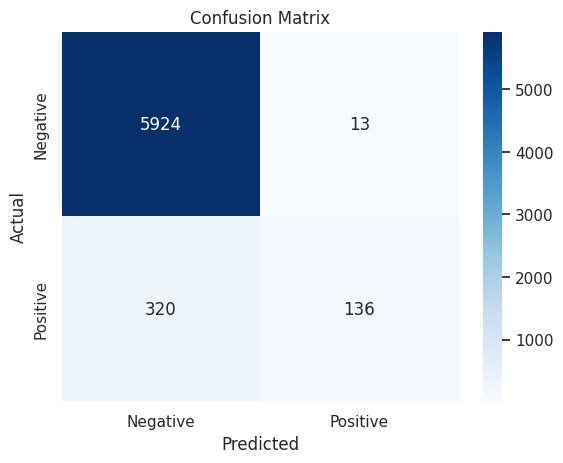

In [ ]:
y_pred = model.predict(X_test)

# Print scores
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## **Save and Use the Model**

In [ ]:
# Save the model
joblib.dump(model, "twitter_sentiment_model.pkl")

# Load and predict
loaded_model = joblib.load("twitter_sentiment_model.pkl")
sample_tweet = ["I don't like how friendly this app is!"]
prediction = loaded_model.predict(sample_tweet)
print("Prediction:", "Positive" if prediction[0] == 1 else "Negative")

Prediction: Negative


## **Summary**

* Loaded Twitter sentiment dataset (positive or negative tweets)

* Built a text classification pipeline using `TfidfVectorizer` + `LogisticRegression`

* Evaluated with accuracy and confusion matrix

* Saved the model for future use

* Next explore `fraud_detection.ipynb` for more details